# Cопоставление и поиск наиболее похожих товаров

## Импорт библиотек

In [3]:
import pandas as pd

In [12]:
pd.set_option('display.max_rows', None)

## Знакомство с данными

Посмотрим на доступный нам набор товаров.

In [6]:
def first_look(df, num_of_srtings=5):
    print('Общая информация')
    display(df.info())
    
    print(f'Первые {num_of_srtings} строк(и) данных')
    display(df.head(num_of_srtings))
    
    print('Основные статистические характеристики данных')
    display(df.describe())
    print('Количество пропусков:')
    print(df.isna().sum())
    print()
    
    print('Количество дубликатов:', df.duplicated().sum())

In [8]:
%%time
base = pd.read_csv('datasets/base.csv', index_col=0)

CPU times: total: 19.8 s
Wall time: 19.9 s


In [9]:
first_look(base)

Общая информация
<class 'pandas.core.frame.DataFrame'>
Index: 2918139 entries, 0-base to 4744766-base
Data columns (total 72 columns):
 #   Column  Dtype  
---  ------  -----  
 0   0       float64
 1   1       float64
 2   2       float64
 3   3       float64
 4   4       float64
 5   5       float64
 6   6       float64
 7   7       float64
 8   8       float64
 9   9       float64
 10  10      float64
 11  11      float64
 12  12      float64
 13  13      float64
 14  14      float64
 15  15      float64
 16  16      float64
 17  17      float64
 18  18      float64
 19  19      float64
 20  20      float64
 21  21      float64
 22  22      float64
 23  23      float64
 24  24      float64
 25  25      float64
 26  26      float64
 27  27      float64
 28  28      float64
 29  29      float64
 30  30      float64
 31  31      float64
 32  32      float64
 33  33      float64
 34  34      float64
 35  35      float64
 36  36      float64
 37  37      float64
 38  38      float64
 39 

None

Первые 5 строк(и) данных


,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
Id,,,,,,,,,,,,,,,,,,,,,
0-base,-115.083890,11.152912,-64.426760,-118.88089,216.482440,-104.698060,-469.070588,44.348083,120.915344,181.449700,...,-42.808693,38.800827,-151.76218,-74.389090,63.66634,-4.703861,92.933610,115.269190,-112.756640,-60.830353
1-base,-34.562202,13.332763,-69.787610,-166.53348,57.680607,-86.098370,-85.076666,-35.637436,119.718636,195.234190,...,-117.767525,41.100000,-157.82940,-94.446806,68.20211,24.346846,179.937930,116.834000,-84.888941,-59.524610
2-base,-54.233746,6.379371,-29.210136,-133.41383,150.895830,-99.435326,52.554795,62.381706,128.951450,164.381470,...,-76.397800,46.011803,-207.14442,127.325570,65.56618,66.325680,81.073490,116.594154,-1074.464888,-32.527206
3-base,-87.520130,4.037884,-87.803030,-185.06763,76.369540,-58.985165,-383.182845,-33.611237,122.031910,136.233580,...,-70.647940,-6.358921,-147.20105,-37.692750,66.20289,-20.566910,137.206940,117.474100,-1074.464888,-72.915490
4-base,-72.743850,6.522049,43.671265,-140.60803,5.820023,-112.074080,-397.711282,45.182500,122.167180,112.119064,...,-57.199104,56.642403,-159.35184,85.944724,66.76632,-2.505783,65.315285,135.051590,-1074.464888,0.319401


Основные статистические характеристики данных


,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
count,2.918139e+06,2.918139e+06,2.918139e+06,2.918139e+06,2.918139e+06,2.918139e+06,2.918139e+06,2.918139e+06,2.918139e+06,2.918139e+06,...,2.918139e+06,2.918139e+06,2.918139e+06,2.918139e+06,2.918139e+06,2.918139e+06,2.918139e+06,2.918139e+06,2.918139e+06,2.918139e+06
mean,-8.622947e+01,8.080077e+00,-4.458080e+01,-1.466350e+02,1.113166e+02,-7.199138e+01,-3.922239e+02,2.035283e+01,1.236842e+02,1.244581e+02,...,-7.902286e+01,3.329735e+01,-1.547962e+02,1.415132e+01,6.779167e+01,2.354490e+01,7.495930e+01,1.155667e+02,-7.993390e+02,-4.779125e+01
std,2.489132e+01,4.953387e+00,3.863166e+01,1.984480e+01,4.634809e+01,2.818607e+01,2.716550e+02,6.421638e+01,6.356109e+00,6.443058e+01,...,3.045642e+01,2.888603e+01,4.122929e+01,9.895115e+01,1.823356e+00,5.534224e+01,6.134500e+01,2.117518e+01,3.854131e+02,4.174802e+01
min,-1.994687e+02,-1.391461e+01,-2.400734e+02,-2.326671e+02,-1.055830e+02,-2.110086e+02,-7.914699e+02,-3.018597e+02,9.315305e+01,-1.738719e+02,...,-2.205662e+02,-8.850774e+01,-3.539028e+02,-1.575944e+02,5.950944e+01,-2.331382e+02,-2.036016e+02,1.572448e+01,-1.297931e+03,-2.267801e+02
25%,-1.030654e+02,4.708491e+00,-6.955949e+01,-1.599051e+02,8.050795e+01,-9.137994e+01,-6.293318e+02,-2.222147e+01,1.194840e+02,8.176751e+01,...,-9.876390e+01,1.698862e+01,-1.807799e+02,-7.130038e+01,6.658096e+01,-1.251624e+01,3.377574e+01,1.016867e+02,-1.074465e+03,-7.566641e+01
50%,-8.623150e+01,8.038950e+00,-4.381661e+01,-1.467768e+02,1.118730e+02,-7.192230e+01,-4.222016e+02,2.080477e+01,1.238923e+02,1.234977e+02,...,-7.848812e+01,3.471502e+01,-1.539773e+02,1.382693e+01,6.781458e+01,2.341649e+01,7.492997e+01,1.160244e+02,-1.074465e+03,-4.859196e+01
75%,-6.925658e+01,1.147007e+01,-1.962527e+01,-1.333277e+02,1.423743e+02,-5.244111e+01,-1.566686e+02,6.391821e+01,1.279705e+02,1.672206e+02,...,-5.853355e+01,5.216429e+01,-1.273405e+02,9.966753e+01,6.902666e+01,5.975511e+01,1.158760e+02,1.295524e+02,-5.057445e+02,-1.971424e+01
max,2.151555e+01,2.993721e+01,1.609372e+02,-5.137478e+01,3.196645e+02,5.880624e+01,1.096325e+02,3.412282e+02,1.522612e+02,4.275421e+02,...,6.017411e+01,1.541678e+02,2.436099e+01,1.850981e+02,7.571203e+01,3.148988e+02,3.395738e+02,2.147063e+02,9.877081e+01,1.269732e+02


Количество пропусков:
0     0
1     0
2     0
3     0
4     0
     ..
67    0
68    0
69    0
70    0
71    0
Length: 72, dtype: int64

Количество дубликатов: 0


In [10]:
print('#', '\t', 'nunique()')
for column in base.columns:
    print(column, '\t', base[column].nunique())

# 	 nunique()
0 	 2285321
1 	 2386657
2 	 2424735
3 	 1996956
4 	 2343801
5 	 2332716
6 	 1927620
7 	 2451946
8 	 1638460
9 	 2369729
10 	 2278347
11 	 2390713
12 	 2421370
13 	 2446117
14 	 2206148
15 	 2377167
16 	 2453573
17 	 2429682
18 	 2295317
19 	 476991
20 	 2290813
21 	 715856
22 	 2438175
23 	 2378478
24 	 2434427
25 	 328121
26 	 2424950
27 	 2264544
28 	 2387476
29 	 1605737
30 	 2452436
31 	 2217562
32 	 2308221
33 	 4048
34 	 2429237
35 	 2270863
36 	 2455086
37 	 1595549
38 	 2026111
39 	 2362155
40 	 2417481
41 	 2437568
42 	 2369966
43 	 2327546
44 	 44247
45 	 2380637
46 	 2410718
47 	 2331893
48 	 2422076
49 	 2439070
50 	 2452714
51 	 2458765
52 	 2139913
53 	 2360360
54 	 1548360
55 	 2098001
56 	 1508673
57 	 2472038
58 	 2352263
59 	 2916064
60 	 2425736
61 	 1696857
62 	 2323782
63 	 2408831
64 	 2239231
65 	 2502958
66 	 925438
67 	 2436763
68 	 2402418
69 	 2180216
70 	 1573822
71 	 2409382


Видим, что в 33ем столбце 4048 значения. Возможно, получится использовать его для разбиения нашего пространства на гиперплоскости для работы в пространствах меньшей размерности.

In [22]:
base['33'].value_counts()

33
-529.295053     182985
-156.249890     124257
-1018.469545    121575
-537.183707     109763
-481.586956      99822
-380.389746      94856
-771.296708      80251
-188.960295      76336
-505.853646      72099
-341.781842      68831
-780.449185      67526
-282.600919      58590
-735.671365      57730
-303.939233      47462
-480.733412      45428
-381.005266      45331
-803.390708      44139
-839.597613      40412
-202.904817      37515
-683.197634      31847
-709.451738      29578
-366.139446      23686
-367.801983      23674
-929.142044      23170
-705.567871      22166
-174.894842      21575
-547.945922      21263
-794.755632      21115
-294.870547      21062
-261.596067      20437
-1017.356578     19448
-143.384195      19408
-331.366174      18905
-311.307196      18546
-224.048030      16237
-907.947920      16132
-978.525318      15659
-841.058757      14487
-986.933068      14105
-767.066576      12953
-903.661984      12871
-361.804367      12614
-579.590387      12604
-751.175

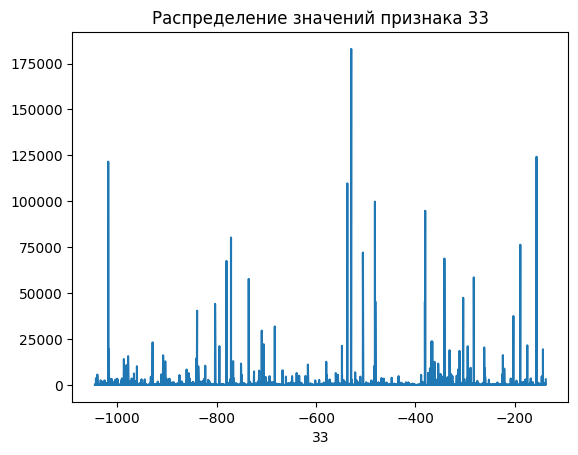

In [35]:
chart = base['33'].value_counts().sort_index().plot()
chart.set_title('Распределение значений признака 33');

если мы разобьем все данные на подмножества одинаковой мощности

На данных этого столбца видны пять наиболее заметных всплесков. попробуем разбить наш датасет на 5 подмножеств, собранных вокруг этих всплесков.

Если разбивать на корзины примерно одинаковой мощности, то за мощность подмножества возьмем количество строк в самом частом значении этого столбца. Сколько тогда подмножеств получим?

In [26]:
 base.shape[0] / 182985

15.947421919829495

Если разбивать по количеству всплесков на графике value_counts

In [31]:
base.shape[0] / 5

583627.8

In [36]:
base['33'].min(), base['33'].max()

(-1045.311529132907, -137.64675674083605)

In [37]:
base['33'].max() - base['33'].min()

907.664772392071

Размах значений при делении на 5 групп

In [40]:
delta = (base['33'].max() - base['33'].min()) / 5
delta

181.53295447841418

Если разделим на 5 групп, то по сколько значений попадет в каждое подмножество?

In [47]:
for i in range(5):
    print(base['33'].min() + i * delta,
          base['33'].min() + (i + 1) * delta,
         '\t',
         base[(base['33'] > (base['33'].min() + i * delta)) & (base['33'] < (base['33'].min() + (i + 1) * delta))].shape[0]
         )

-1045.311529132907 -863.7785746544928 	 421247
-863.7785746544928 -682.2456201760787 	 641206
-682.2456201760787 -500.71266569766453 	 565739
-500.71266569766453 -319.1797112192503 	 634400
-319.1797112192503 -137.64675674083605 	 652485
